## This file constructs empirical graphs related to the topic of the OLG model
In order, the graphs are:
- Birth rates
- Life expectancy
- Pension expenditure
- Share of private pension schemes

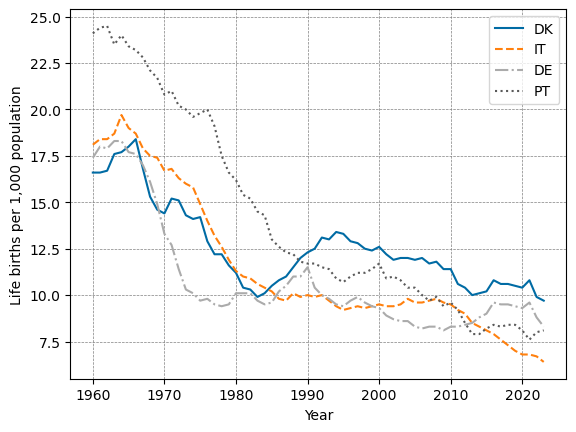

In [1]:
## Demographic statistics -- Life births
import numpy as np
import eurostat
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('tableau-colorblind10')

LS =["-","--","-.",":","-","--","-.",":"]

demo = eurostat.get_data_df('demo_gind') #Monthly unemployment rate, percentage of labor force

demo_birth = demo.loc[((demo['indic_de'] == 'LBIRTH') ) ] #Life births
demo_avg = demo.loc[((demo['indic_de'] == 'FAVG') ) ] #Average female population
demo_cbr = demo.loc[((demo['indic_de'] == 'GBIRTHRT') ) ]

def reshape(data):
    new = data.drop(['freq','indic_de'],axis=1)  #drop the columns that are no longer needed
    new = pd.melt(new, id_vars=['geo\TIME_PERIOD'], var_name='time', value_name='value') #Reshape the data into long format
    new = new.rename(columns={"geo\TIME_PERIOD": "country", "time": "year"})
    new['yy'] = pd.to_datetime(new['year'])
    return new

demo_birth = reshape(demo_birth)
demo_avg = reshape(demo_avg)
demo_cbr = reshape(demo_cbr)

countrylist = ('DK','IT', 'DE','PT') #List of countries to be plotted

i=0
for country in countrylist:
    
    #temp1 = demo_birth.loc[demo_birth['country'] == country] 
    #temp2 = demo_avg.loc[demo_avg['country'] == country] 
    temp = demo_cbr.loc[demo_cbr['country'] == country] 
    
    plt.plot(temp.yy,temp.value, label = country, linestyle = LS[i])
    i+=1

plt.legend(frameon=False,loc = 'upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Life births per 1,000 population')
plt.xlabel('Year')
plt.legend(loc='upper right')
plt.savefig('popgrowth.pdf')

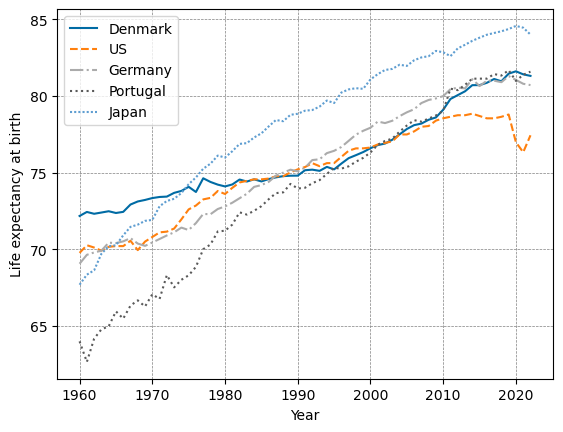

In [2]:
## Life expectancy at birth
from fredapi import Fred #need to install this
fred = Fred(api_key='c0a963cd5bd17449f6d4b6a4e8d18f14')

le_us = fred.get_series('SPDYNLE00INUSA') #USA
le_jp = fred.get_series('SPDYNLE00INJPN') #JAPAN
le_pt = fred.get_series('SPDYNLE00INPRT') #PORTUGAL
le_dk = fred.get_series('SPDYNLE00INDNK') #DENMARK
le_de = fred.get_series('SPDYNLE00INDEU') #GERMANY

plt.plot(le_dk,  linestyle = LS[0], label ='Denmark')
plt.plot(le_us, linestyle = LS[1], label ='US')
plt.plot(le_de,linestyle = LS[2], label ='Germany')
plt.plot(le_pt,  linestyle = LS[3], label ='Portugal')
plt.plot(le_jp, linestyle =(0, (1, 1)), label ='Japan')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Life expectancy at birth')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.savefig('life_expect.pdf')



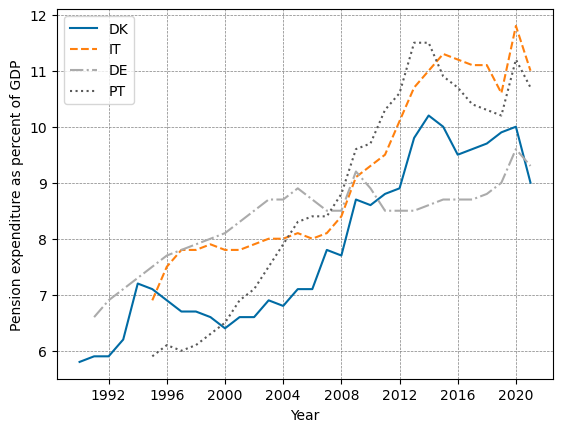

In [3]:
## Pension expenditure in the EU
pension = eurostat.get_data_df('spr_exp_pens') #Pension expenditure

pension = pension.loc[((pension['spdepb'] == 'SCPOLDPEN') & (pension['spdepm'] == 'TOTAL') & (pension['unit'] == 'PC_GDP'))  ] #Life births

def reshape(data):
    new = data.drop(['freq','spdepb','spdepm','unit'],axis=1)  #drop the columns that are no longer needed
    new = pd.melt(new, id_vars=['geo\TIME_PERIOD'], var_name='time', value_name='value') #Reshape the data into long format
    new = new.rename(columns={"geo\TIME_PERIOD": "country", "time": "year"})
    new['yy'] = pd.to_datetime(new['year'])
    return new

pension = reshape(pension)
countrylist = ('DK','IT', 'DE','PT') #List of countries to be plotted
i=0
for country in countrylist:
    temp = pension.loc[pension['country'] == country] 
    
    plt.plot(temp.yy,temp.value, label = country, linestyle = LS[i])
    i+=1

plt.legend(frameon=False,loc = 'upper left')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Pension expenditure as percent of GDP')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.savefig('pension_exp.pdf')


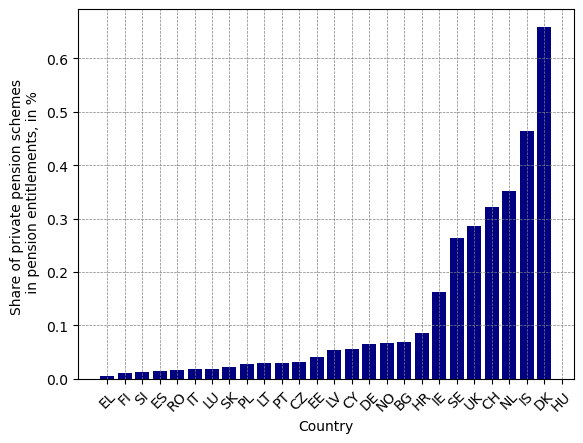

In [4]:
## Type of pension expenditure EU
type = eurostat.get_data_df('nasa_10_pens1') #Pension expenditure

tot_type = type.loc[((type['penscheme'] == 'S1P') & (type['na_item'] == 'F63_LE') & (type['unit'] == 'MIO_EUR'))  ] #Life births
priv_type = type.loc[((type['penscheme'] == 'S12P') & (type['na_item'] == 'F63_LE') & (type['unit'] == 'MIO_EUR'))  ] #Life births

def reshape(data):
    new = data.drop(['freq','unit','penscheme','na_item'],axis=1)  #drop the columns that are no longer needed
    new = pd.melt(new, id_vars=['geo\TIME_PERIOD'], var_name='time', value_name='value') #Reshape the data into long format
    new = new.rename(columns={"geo\TIME_PERIOD": "country", "time": "year"})
    new['yy'] = pd.to_datetime(new['year'])
    return new

tot_type = reshape(tot_type)
priv_type = reshape(priv_type)
graph1 = tot_type.loc[(tot_type['year'] == '2018' )]
graph2 = priv_type.loc[(priv_type['year'] == '2018' )]

priv_share = graph2.value/graph1.value
ps = priv_share.values
cs = graph2.country.values

sort = np.argsort(ps)
sortkeep = sort[sort>1]

plt.bar(cs[sortkeep][0:-1],ps[sortkeep][0:-1], color = 'navy')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Share of private pension schemes \n in pension entitlements, in %')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.savefig('private_pension.pdf')
